# Google Merchandise Store Dataset Introduction

The goal of this notebook is to familize yourself with the public datasets we will practice sequence modeling on.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

## Introduction to the datasets

Google has a merchandise store where anyone can order google branded merchandise. This is an ecommerce website just like Amazon as you can add products to a shopping chart, pay for it, and have it shipped to your home.

Google open sourced real data from this website having customers access the website and potentially buy products.

Did you know when you access a website every click you make will likely create a row of data in that compananies clickstream dataset? 

They can see every click you make on the website, the fields you fill out, how much time is spent on each page, if you are on an apple iphone or a desktop pc, if your ip address maps to a specific geography, etc.

What cannot typically be known is exactly who you are until you sign in with an email or fill out a form. 

The original raw csv was extremely large 25+ GB so to keep the project staightforward we randomly sampled visitors and 

There are two csv that were generated for this project from the raw clickstream. **sequence fact** and **visitor detail**

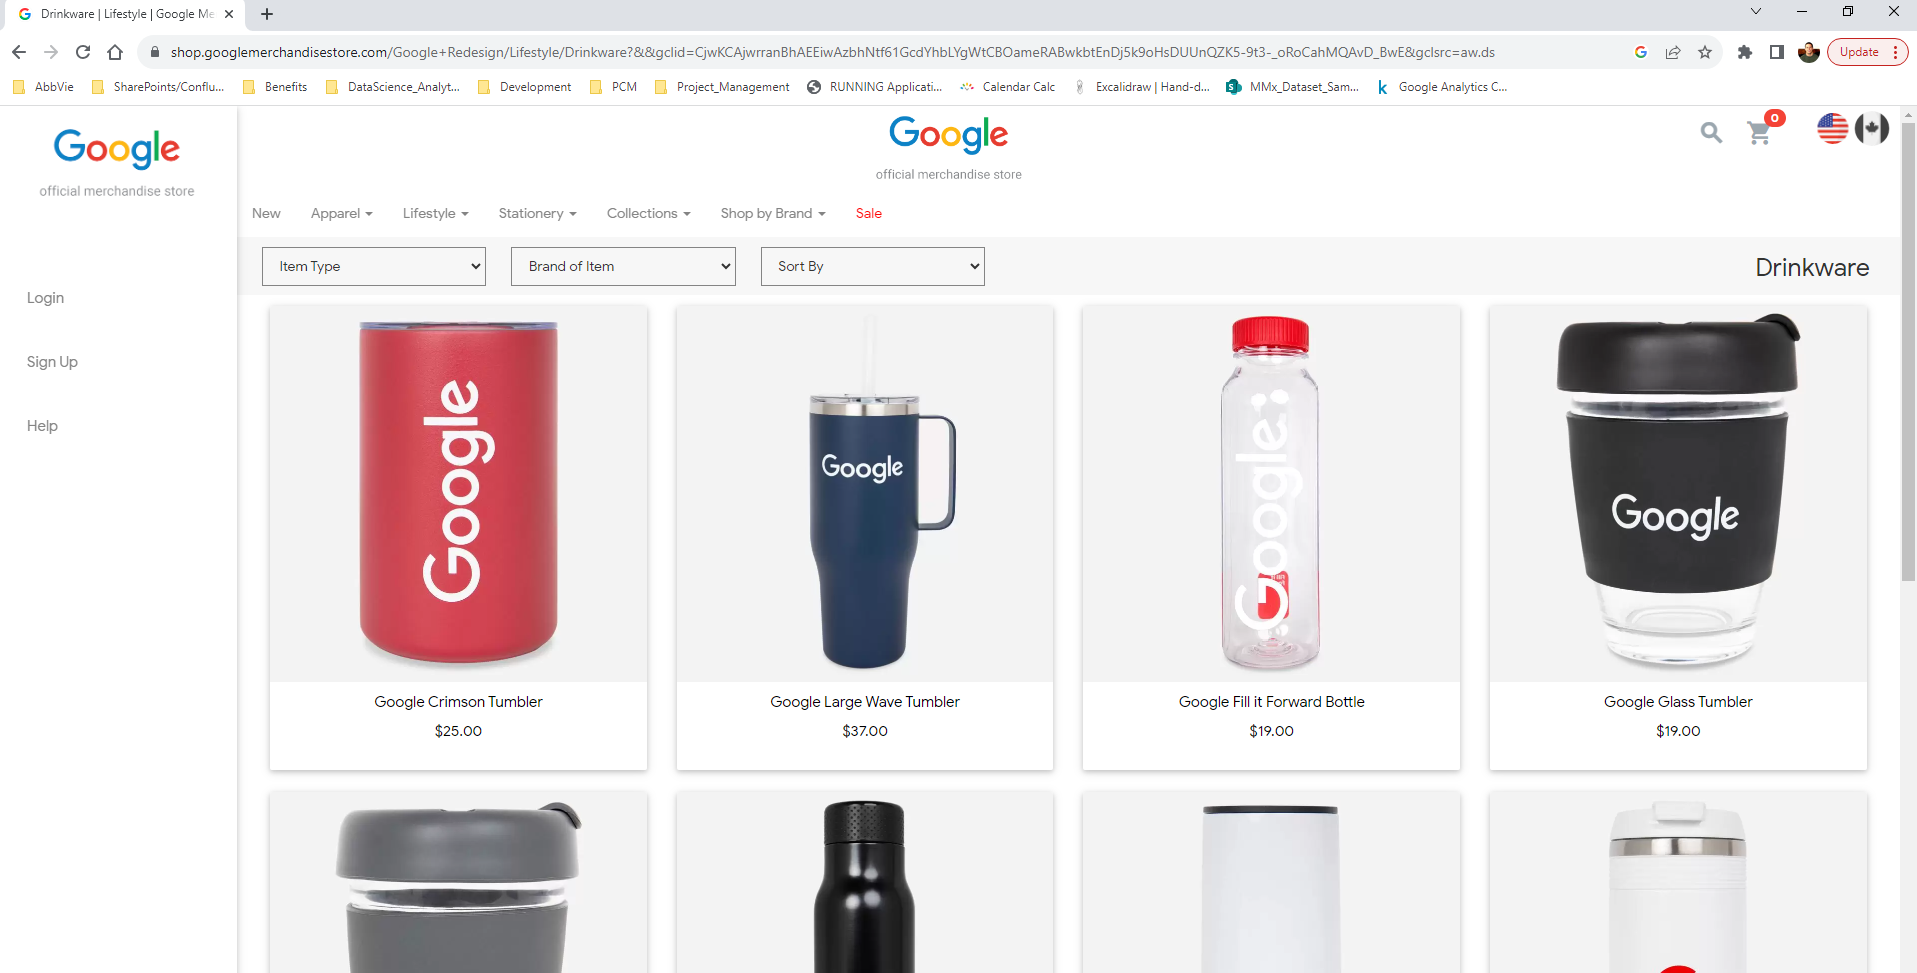

## Sequence Table

The first dataset has visitor sequences. The sequences are a series of channels the visitor used to get to the website until they either had a conversion (bought something) or reached a dead end (we never saw them return to the website again).

Let's take a look at the top 10 rows.

In [3]:
sequence_df = pd.read_csv('../datasets/sequence_fact.csv')
sequence_df.head(10)

,sequence_id,fullVisitorId,event_name,event_datetime,conversion_proximity
0,0099Rqojoj1MCXN,7343617347507729080,organic_search,2018-04-15 17:31:50,75.0
1,0099Rqojoj1MCXN,7343617347507729080,dead_end,2018-04-15 17:33:05,0.0
2,00A9Lkka73okUx2,89656057821147903,organic_search,2017-09-14 16:36:56,1033.0
3,00A9Lkka73okUx2,89656057821147903,dead_end,2017-09-14 16:54:09,0.0
4,00B30tmbMwJn7Cf,4307745811624101170,organic_search,2017-04-21 02:41:23,1.0
5,00B30tmbMwJn7Cf,4307745811624101170,dead_end,2017-04-21 02:41:24,0.0
6,00BKxKnEYlKbw9b,7129167701457127936,organic_search,2016-10-02 15:16:09,1.0
7,00BKxKnEYlKbw9b,7129167701457127936,dead_end,2016-10-02 15:16:10,0.0
8,00EttOfsTTyp45B,3217678225016118393,referral,2017-10-23 19:44:20,143.0
9,00EttOfsTTyp45B,3217678225016118393,dead_end,2017-10-23 19:46:43,0.0


- **sequence id**: a touchpoint journey for a visitor on the website. A visitor id can have multiple touchpoint journies if they have multiple conversions. If a visitor id never bought anything it will result in a single sequence with a dead end.

- **full visitor id**: a visitor id helps us track a given user across many sessions so we have a history of user activity across days, weeks, months of engagement to the website. However, visitor id is something that is added and tracked via a cookie so it may not perfectly capture the true reality of a customers engagment with our website. For example if the user deletes cookies they will get a new visitor id created the next time they come to our website. We don't have a better solution so for analysis purposes we can use these visitor ids as if they are people but technically it gets messy. 

- **event name**: these are either channels the visitor used to get to the website. Direct, organic search, referral, digital display, paid search, etc.

   - Direct: used a bookmark or typed in the url directly into the browser
   - Paid Search: searched on google or bing then clicked an ad link at the top of the results
   - Organic search: searched on google or bing then clicked a link that what not an ad link at the top
   - Referral: a link from some other website brought them to our store, usually not a paid link
   - Affiliates: like a referral but there is some sort of formal relationship and paid incentive for the affiliate to send them to us
   - Social: traffic that comes from various social media platforms which can be paid or organic
   - Display: Square or rectangular banner ads placed on other websites. Kind of like internet billboards.

- **event datetime**: A datetime for when the channel was used for the traffic to arrive at our website, or a datetime for when the conversion or dead end happened.

- **conversion proximity**: The distance in a sequence in seconds from the event in the sequence to either the conversion or dead end.

Now lets take a look at the a sequence that ended in conversion.

In [4]:
sequence_df[sequence_df['sequence_id']=='0OcTf9iis2bwtGH']

,sequence_id,fullVisitorId,event_name,event_datetime,conversion_proximity
1541,0OcTf9iis2bwtGH,6708661699896063078,referral,2017-08-04 17:08:02,5273906.0
1542,0OcTf9iis2bwtGH,6708661699896063078,organic_search,2017-08-04 17:10:37,5273751.0
1543,0OcTf9iis2bwtGH,6708661699896063078,referral,2017-09-06 02:47:03,2474365.0
1544,0OcTf9iis2bwtGH,6708661699896063078,organic_search,2017-09-06 02:59:49,2473599.0
1545,0OcTf9iis2bwtGH,6708661699896063078,referral,2017-09-15 17:15:52,1644636.0
1546,0OcTf9iis2bwtGH,6708661699896063078,referral,2017-10-04 17:47:16,1152.0
1547,0OcTf9iis2bwtGH,6708661699896063078,conversion,2017-10-04 18:06:28,0.0


#### How the clickstream visitor id corresponds to "cookies".

There is a concept of cookies where the website writes something to your computer so the website has some form of memory on your total history of the website even when you leave for a few days and come back. Have you ever noticed that once you login to a website and then come back a day or even weeks later the website knows you have an account and just asks you to login rather than treating you like a complete stranger? This works because of cookies.

There might also be third party cookies that are writen to your computer so when you go to another website you can see advertisements (retargeting advertisements). Reminding you about the visit you had. 

A cookie does not actually represent a single person. It only persists for a given device browser combination and the average person might have 3-6 device browser combinations they actually use. So you will notice if you are using a website on chrome but then switch to safari or internet explorer you will have to login again the website will think you are a stranger again at first.



## Visitor Detail Dataset

This is a table with one visitor id and then characteristics we know about the visitor id. This can be joined to the sequence table to introduce more insights or modeling across visitor characteristics such as:

- device category: are they on mobile, desktop, or tablet?
- device browser: are they on chrome, safari, edge, firefox?
- geography: what country or metro are they in (can be a VPN so may not be an individuals real geo).

In [5]:
visitor_detail_df = pd.read_csv('../datasets/visitor_detail.csv')
visitor_detail_df.head(10)

,fullVisitorId,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_metro
0,0000650183049109374,Chrome,Android,True,mobile,Asia,Southern Asia,India,(not set)
1,0000750929315523353,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset
2,000094154452308463,Safari,iOS,True,tablet,Americas,Northern America,United States,not available in demo dataset
3,000106364568517340,Chrome,Windows,False,desktop,Americas,South America,Peru,(not set)
4,0001348344294054462,Chrome,Linux,False,desktop,Americas,Northern America,United States,New York NY
5,0001737926054836229,Safari,iOS,True,tablet,Europe,Northern Europe,United Kingdom,not available in demo dataset
6,0001858327036304483,Chrome,Macintosh,False,desktop,Americas,Northern America,Canada,(not set)
7,0001875931252987660,Chrome,Windows,False,desktop,Americas,South America,Colombia,not available in demo dataset
8,0001907711190075679,Safari,iOS,True,mobile,Americas,Northern America,Canada,not available in demo dataset
9,0002143786952964882,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,San Francisco-Oakland-San Jose CA


## Our Mission (with the public dataset):

Our website and marketing team want to understand the best sources of traffic to optimize on. They want to determine:

- For each channel what are some optimal positionings to consider? E.g. is Social most valuable as the last channel to use before buying or is it more valuable earlier on for finding new customers?
- What unique customer journies or channel sequences tend to provide the most value?
- What is the right order of channels to execute given different visitor id characteristics (e.g. mobile, desktop, tablet)
- *bonus* how does proximity play into this? E.g. Should we only consider channel engagment in a 30 day window? Can we build a model that also assigns value based on channel proximity to conversion?

With this intel our marketers can understand which channels to invest more in to get the best ROI.

Besides these general use cases the MTA can also be used by our paid search team:
 - Our paid search team wants to leverage an in-house solution to attribute value back to the GCLID which can further optimize the keyword bidding algorithm. 